In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/cru/cru_ts4.06.1901.2021.pre.dat.nc')
 

data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 419)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1981-02-15 1981-03-16 ... 2015-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 140)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1981-06-16 1981-07-16 ... 2015-09-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:  (lon: 16, lat: 20, time: 140)
Coordinates:
  * lon      (lon) float32 86.25 86.75 87.25 87.75 ... 92.25 92.75 93.25 93.75
  * lat      (lat) float32 18.25 18.75 19.25 19.75 ... 26.25 26.75 27.25 27.75
  * time     (time) datetime64[ns] 1981-06-16 1981-07-16 ... 2015-09-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [8]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:  (time: 140, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1981-06-16 1981-07-16 ... 2015-09-16
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    pre      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    stn      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pre.mean('time')
 
jjas_mean

<xarray.DataArray 'pre' (lat: 40, lon: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 303.91000574, 309.37893457, ..., 253.93687917,
        295.54098661,          nan],
       [         nan, 257.49107598, 214.96571834, ..., 225.63455745,
        259.88330828,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167
pr_mm


cru = pr_mm

In [11]:
#opening eraint data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_was-22-ecmwf_197901-201711_remap1.nc')
 

data

<xarray.Dataset>
Dimensions:    (time: 467, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2017-11-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 20 11:06:26 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2015-11-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-02-01 ... 2015-12-01
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 20 11:06:26 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [13]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2015-09-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-07-01 ... 2015-10-01
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 20 11:06:26 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [14]:
#jjas_data.x.values
#jjas_data.y.values


In [15]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2015-09-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-07-01 ... 2015-10-01
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 20 11:06:26 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [16]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[9.38161538e-05, 9.78686148e-05, 1.02379185e-04, ...,
        1.29697612e-04, 1.41800090e-04, 1.67867591e-04],
       [8.32291771e-05, 8.84977344e-05, 9.26317007e-05, ...,
        1.30254601e-04, 1.46988954e-04, 1.63539080e-04],
       [7.47940649e-05, 7.95030865e-05, 8.42977170e-05, ...,
        1.31012566e-04, 1.56441878e-04, 1.76820467e-04],
       ...,
       [2.42625785e-04, 3.00330255e-04, 3.55353463e-04, ...,
        2.42249822e-04, 2.39482979e-04, 1.75896639e-04],
       [2.18096742e-04, 2.60949571e-04, 3.84435843e-04, ...,
        1.88273552e-04, 2.70643970e-04, 2.67411553e-04],
       [1.83395139e-04, 3.61133221e-04, 9.19390470e-04, ...,
        1.71889536e-04, 2.75563652e-04, 3.50650196e-04]], dtype=float32)
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [17]:
eraint = jjas_mean*86400
eraint

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 8.10571569,  8.45584832,  8.84556156, ..., 11.20587364,
        12.25152779, 14.50375984],
       [ 7.1910009 ,  7.64620425,  8.00337894, ..., 11.2539975 ,
        12.69984562, 14.12977651],
       [ 6.4622072 ,  6.86906667,  7.28332275, ..., 11.31948573,
        13.51657826, 15.27728839],
       ...,
       [20.96286784, 25.94853407, 30.70253916, ..., 20.93038461,
        20.69132938, 15.19746962],
       [18.84355852, 22.54604297, 33.21525687, ..., 16.26683492,
        23.38363901, 23.10435819],
       [15.84534002, 31.20191032, 79.43533659, ..., 14.85125595,
        23.80869957, 30.29617695]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [18]:
bias = eraint - cru
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, 15.95698318, 20.53118808, ..., 12.58178403,
        10.97492403,         nan],
       [        nan, 14.08059221, 26.14789854, ...,  8.84872061,
        14.83953961,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
bias_percentage = ((eraint - cru)/cru)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 159.70476828, 201.85310586, ..., 150.70530586,
        112.95251315,          nan],
       [         nan, 166.33009417, 369.98121912, ..., 119.28530955,
        173.68172943,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

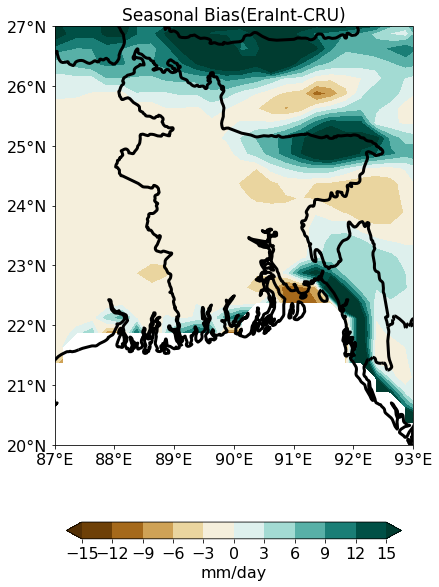

In [24]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, ticks=np.arange(-15,15+3,3),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

plt.rcParams['font.size'] = '16'


plt.title('Seasonal Bias(EraInt-CRU)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(eraint-cru).png")




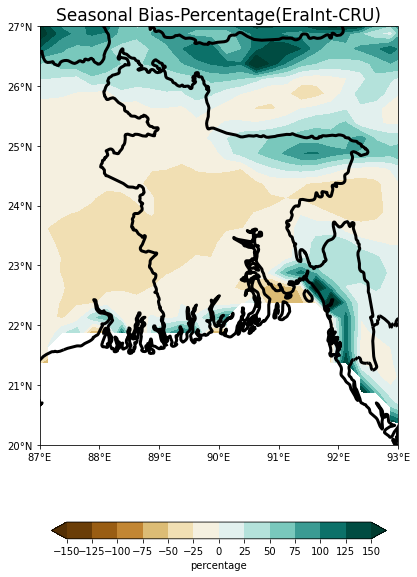

In [21]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'][:], bias_percentage['lat'][:],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25),transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

#levels=(-150,-100,-75,-50,-25,-10,-5,0,5,10,25,50,75,100,150),
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25) ,orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 
    
plt.title('Seasonal Bias-Percentage(EraInt-CRU)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(eraint-cru).png")





In [22]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r